# Project Code

In [51]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
#############
### Problem 1

In [3]:
gpa = pd.read_csv("gpa.csv")

In [4]:
gpa.head(3)
#gpa.describe()

,gpa,act
0,3.897,21
1,3.885,14
2,3.778,28


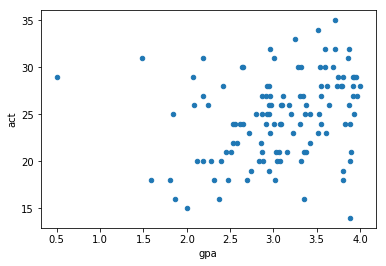

In [24]:
fig1_1 = gpa.plot.scatter(x='gpa', y='act')

In [6]:
cor = gpa['gpa'].corr(gpa['act'])
cor

0.2694818032662637

In [7]:
# Nonparametric Bootstrap
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [54]:
# def pearsonr_ci(x,y,confidence=0.95):
#     ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
#     Parameters
#     ----------
#     x, y : iterable object such as a list or np.array
#       Input for correlation calculation
#     alpha : float
#       Significance level. 0.05 by default
#     Returns
#     -------
#     r : float
#       Pearson's correlation coefficient
#     pval : float
#       The corresponding p value
#     lo, hi : float
#       The lower and upper bound of confidence intervals
#     '''
#     alpha = 1 - confidence
#     r, p = stats.pearsonr(x,y)
#     r_z = np.arctanh(r)
#     se = 1/np.sqrt(x.size-3)
#     z = stats.norm.ppf(1-alpha/2)
#     lo_z, hi_z = r_z-z*se, r_z+z*se
#     lo, hi = np.tanh((lo_z, hi_z))
#     print("Pearson's correlation coefficient is %f, p-value is %f, lower bound is %f, upper bound is %f" %(r, p, lo, hi))

In [8]:
# repl = 10000

# population = np.random.normal(loc=mean, scale=stdev, size=50000)

# # take 1k 'samples' from the larger population
# samples = population[:1000]

# print(bs.bootstrap(samples))

# R code in the following
```
my <- read.csv(file = "/home/jiadao/Code/Github/CS6313-Stat/Pj4/gpa.csv", header = TRUE, sep = ",") 
df <- data.frame(my)
n = nrow(df)
Brep = 10000

# Bootstrap the correlation coefficient
cc <- function(d,i=c(1:n)){
        d2 <- d[i,]
        return(cor(d2$gpa,d2$act))
     }
bootcorr <- boot(data=df,statistic=cc,R=Brep)
bootcorr
        ORDINARY NONPARAMETRIC BOOTSTRAP
    
        Call:
        boot(data = df, statistic = cc, R = Brep)

        Bootstrap Statistics :
            original      bias    std. error
        t1* 0.2694818 0.003035951   0.1060727
boot.ci(bootcorr,conf=.95)
        BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
        Based on 10000 bootstrap replicates

        CALL : 
        boot.ci(boot.out = bootcorr, conf = 0.95)

        Intervals : 
        Level      Normal              Basic         
        95%   ( 0.0585,  0.4743 )   ( 0.0581,  0.4738 )  

        Level     Percentile            BCa          
        95%   ( 0.0652,  0.4809 )   ( 0.0414,  0.4604 )  
        Calculations and Intervals on Original Scale
```

In [10]:
#############
### Problem 2

In [14]:
volt = pd.read_csv("VOLTAGE.csv")

In [49]:
volt_loc = volt.loc[volt["location"] == 1]
volt_rem = volt.loc[volt["location"] == 0]
print("sample number of LOCAL is %d and sample number of REMOTE is %d" %(len(volt_loc), len(volt_rem)))
# plt.scatter(volt_loc[],volt_loc['locat'])
# plt.title("title")
# plt.xlabel("x-label")
# plt.ylabel("y-label")
# plt.show()

sample number of LOCAL is 30 and sample number of REMOTE is 30


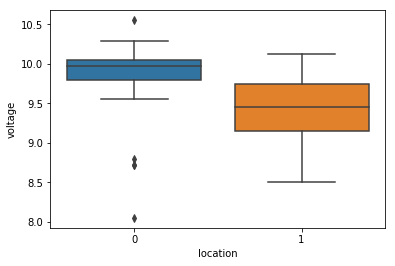

In [45]:
import seaborn as sns
fig2 = sns.boxplot(data=volt, x='location', y='voltage')

In [141]:
def tCI(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
#     return m, m-h, m+h
    print("From {:0.2%}".format(confidence),"confidence interval analysis of t-student distribution, mean is %f, lower bound is %f, upper bound is %f" %(m, m-h, m+h))
    
def normCI(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
#     return m, m-h, m+h
    print("From {:0.2%}".format(confidence),"confidence interval analysis of normal distribution, mean is %f, lower bound is %f, upper bound is %f" %(m, m-h, m+h))

In [142]:
tCI(volt_rem['voltage'])

From 95.00% confidence interval analysis of t-student distribution, mean is 9.803667, lower bound is 9.601686, upper bound is 10.005648


In [129]:
mean_confidence_interval(volt_loc['voltage'])

From 95.00% confidence interval analysis, mean is 9.422333, lower bound is 9.243518, upper bound is 9.601148


In [11]:
#############
### Problem 3

In [131]:
vapor = pd.read_csv("VAPOR.csv")

In [135]:
vapor['diff'] = vapor['theoretical'] - vapor['experimental']

In [139]:
pd.DataFrame(vapor['diff']).describe()

,diff
count,16.000000
mean,0.000688
std,0.014216
min,-0.026000
25%,-0.010000
50%,0.004000
75%,0.008500
max,0.029000
